In [2]:
import numpy as np
import pandas as pd

In [3]:
data_1 = pd.read_csv('USA_House_prices.csv')
data_1

,availability,location,size,society,total_sqft,bath,balcony,price
0,46010,New Bedford,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Ready To Move,Fort Dodge,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Ready To Move,Stowell,3 BHK,NaN,1440,2.0,3.0,62.00
3,Ready To Move,Woodburn,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Ready To Move,Cuyahoga Falls,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...
13315,Ready To Move,Beetham,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Ready To Move,Waukesha,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Ready To Move,Lynnwood,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,45826,Kaysville,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [4]:
data_1.head(10)

,availability,location,size,society,total_sqft,bath,balcony,price
0,46010,New Bedford,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Ready To Move,Fort Dodge,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Ready To Move,Stowell,3 BHK,NaN,1440,2.0,3.0,62.00
3,Ready To Move,Woodburn,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Ready To Move,Cuyahoga Falls,2 BHK,NaN,1200,2.0,1.0,51.00
5,Ready To Move,Beetham,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,45795,South Jordan,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Ready To Move,Texas,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Ready To Move,North Providence,3 BHK,NaN,1310,3.0,1.0,63.25
9,Ready To Move,Weymouth,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [5]:
data_1.shape

(13320, 8)

# So our data contain 13320 rows and 8 columns

# Let's start with Data cleaning

# A)-  Drop the columns


 1 - 'Availability'
 

2 - 'Society' 


3 - 'balcony'

In [6]:
data_2 = data_1.drop(['availability','society','balcony'],axis= 'columns')

In [7]:
data_2.head(10)

,location,size,total_sqft,bath,price
0,New Bedford,2 BHK,1056,2.0,39.07
1,Fort Dodge,4 Bedroom,2600,5.0,120.00
2,Stowell,3 BHK,1440,2.0,62.00
3,Woodburn,3 BHK,1521,3.0,95.00
4,Cuyahoga Falls,2 BHK,1200,2.0,51.00
5,Beetham,2 BHK,1170,2.0,38.00
6,South Jordan,4 BHK,2732,4.0,204.00
7,Texas,4 BHK,3300,4.0,600.00
8,North Providence,3 BHK,1310,3.0,63.25
9,Weymouth,6 Bedroom,1020,6.0,370.00


# B)- Check the existance of NULL values

If Null values are there, then either remove them or impute them

In [8]:
data_2.isnull().sum()

location       0
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [9]:
data_3 = data_2.dropna()

In [10]:
data_3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [11]:
data_3.shape

(13247, 5)

# C)- Check the formatting Issue

Here the column 'total_sqft' has a few formatting issues

In [12]:
data_3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [13]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [14]:
data_3[~data_3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price
30,Redmire,4 BHK,2100 - 2850,4.0,186.000
122,California,4 BHK,3067 - 8156,4.0,477.000
137,Jonesboro,2 BHK,1042 - 1105,2.0,54.005
165,Petersburg,2 BHK,1145 - 1340,2.0,43.490
188,Mansfield,2 BHK,1015 - 1540,2.0,56.800
410,Bismarck,1 BHK,34.46Sq. Meter,1.0,18.500
549,Kirkwood,2 BHK,1195 - 1440,2.0,63.770
648,Meriden,9 Bedroom,4125Perch,9.0,265.000
661,Redmire,2 BHK,1120 - 1145,2.0,48.130
672,Idaho Falls,4 Bedroom,3090 - 5002,4.0,445.000


In [15]:
def sqrt_conversion(x):
    g = x.split('-')
    if len(g) == 2:
        x = (float(g[0])+float(g[1]))/2
        return x
    else:
        try:
            return float(x)
        except:
            return None
            

In [16]:
sqrt_conversion('44-56')

50.0

In [17]:
sqrt_conversion('34.46Sq. Meter')

In [18]:
data_3['total_sqft'] = data_3['total_sqft'].apply(sqrt_conversion)

C:\Users\moham\AppData\Local\Temp\ipykernel_15852\256704232.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_3['total_sqft'] = data_3['total_sqft'].apply(sqrt_conversion)


In [19]:
data_3.loc[30]

location      Redmire
size            4 BHK
total_sqft     2475.0
bath              4.0
price           186.0
Name: 30, dtype: object

In [20]:
data_3.isnull().sum()

location       0
size           0
total_sqft    46
bath           0
price          0
dtype: int64

In [21]:
data_4 = data_3.dropna()

In [22]:
data_4.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [23]:
data_4.shape

(13201, 5)

# These are all about the data cleaning. 

# Now let us start with feature engineering.

# A)- we are going to create 2 new features or columns

1 - Number of BHK 

2 - Price per sqft

In [24]:
data_4.head()

,location,size,total_sqft,bath,price
0,New Bedford,2 BHK,1056.0,2.0,39.07
1,Fort Dodge,4 Bedroom,2600.0,5.0,120.00
2,Stowell,3 BHK,1440.0,2.0,62.00
3,Woodburn,3 BHK,1521.0,3.0,95.00
4,Cuyahoga Falls,2 BHK,1200.0,2.0,51.00


In [25]:
data_4['BHK'] = data_4['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\moham\AppData\Local\Temp\ipykernel_15852\3156832039.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_4['BHK'] = data_4['size'].apply(lambda x: int(x.split(' ')[0]))


In [26]:
data_4.head(10)

,location,size,total_sqft,bath,price,BHK
0,New Bedford,2 BHK,1056.0,2.0,39.07,2
1,Fort Dodge,4 Bedroom,2600.0,5.0,120.00,4
2,Stowell,3 BHK,1440.0,2.0,62.00,3
3,Woodburn,3 BHK,1521.0,3.0,95.00,3
4,Cuyahoga Falls,2 BHK,1200.0,2.0,51.00,2
5,Beetham,2 BHK,1170.0,2.0,38.00,2
6,South Jordan,4 BHK,2732.0,4.0,204.00,4
7,Texas,4 BHK,3300.0,4.0,600.00,4
8,North Providence,3 BHK,1310.0,3.0,63.25,3
9,Weymouth,6 Bedroom,1020.0,6.0,370.00,6


In [27]:
data_4['price_per_sqrt'] = data_4['price']*100000/data_4['total_sqft']

C:\Users\moham\AppData\Local\Temp\ipykernel_15852\4038953455.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_4['price_per_sqrt'] = data_4['price']*100000/data_4['total_sqft']


In [28]:
data_4.head(10)

,location,size,total_sqft,bath,price,BHK,price_per_sqrt
0,New Bedford,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Fort Dodge,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Stowell,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Woodburn,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Cuyahoga Falls,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Beetham,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,South Jordan,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Texas,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,North Providence,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,Weymouth,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


#  B)- Reduce the number of categories in the categorical column 'location'

In [29]:
len(data_4.location.unique())

1289

In [30]:
data_4.location = data_4.location.apply(lambda x: x.strip())
location_stats = data_4.groupby('location')['location'].agg('count').sort_values(ascending = False)

C:\Users\moham\AppData\Local\Temp\ipykernel_15852\2594524564.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_4.location = data_4.location.apply(lambda x: x.strip())


In [31]:
location_stats

location
Beetham         532
Glendale        392
Lowell          302
Freeport        264
Egton Bridge    232
               ... 
Natchez           1
Nenthead          1
Cayce             1
New Bern          1
Lakeland          1
Name: location, Length: 1289, dtype: int64

In [32]:
LS_lessthan_10 = location_stats[location_stats <=10]
LS_lessthan_10

location
Green River     10
Olive Branch    10
Frederick       10
Wasilla         10
Gunnerside      10
                ..
Natchez          1
Nenthead         1
Cayce            1
New Bern         1
Lakeland         1
Name: location, Length: 1049, dtype: int64

In [33]:
len(LS_lessthan_10)

1049

Now we are going to convert the entire 1049 locations into new category called 'other'

In [34]:
data_4.location = data_4.location.apply(lambda x: 'other' if x in LS_lessthan_10 else x)

C:\Users\moham\AppData\Local\Temp\ipykernel_15852\1803070424.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_4.location = data_4.location.apply(lambda x: 'other' if x in LS_lessthan_10 else x)


In [35]:
data_4

,location,size,total_sqft,bath,price,BHK,price_per_sqrt
0,New Bedford,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Fort Dodge,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Stowell,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Woodburn,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Cuyahoga Falls,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Beetham,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,other,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Lynnwood,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Kaysville,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [36]:
len(data_4.location.unique())

241

# Thses are all about feature engineering

# Now, Let's start with outlier detection and removal

Here we are approaching 4 methods to remove the outliers.

# Approach 1: Unusual Bedroom-to-Square-Foot Ratio

In [37]:
data_4[data_4['total_sqft']/data_4['BHK'] < 300]

,location,size,total_sqft,bath,price,BHK,price_per_sqrt
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,Hastings,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Milbank,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,other,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13277,other,7 Bedroom,1400.0,7.0,218.0,7,15571.428571
13279,other,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13281,Burrillville,5 Bedroom,1375.0,5.0,125.0,5,9090.909091
13303,Stillington,5 Bedroom,774.0,5.0,70.0,5,9043.927649


In [38]:
data_5 = data_4[~(data_4['total_sqft']/data_4['BHK'] < 300)]

In [39]:
data_5

,location,size,total_sqft,bath,price,BHK,price_per_sqrt
0,New Bedford,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Fort Dodge,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Stowell,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Woodburn,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Cuyahoga Falls,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Beetham,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,other,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Lynnwood,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Kaysville,4 BHK,4689.0,4.0,488.00,4,10407.336319


# Approach 2: Filtering Extreme Price Per Square Foot Values Using Standard Deviation

In [40]:
data_5.price_per_sqrt.describe()

count     12457.000000
mean       6308.427888
std        4167.968413
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqrt, dtype: float64

In [41]:
def remove_pps_outliers(df):
    new_df = pd.DataFrame()
    for location,subdf in df.groupby('location'):
        mean = np.mean(subdf.price_per_sqrt)
        sd = np.std(subdf.price_per_sqrt)
        reduced_df = subdf[(subdf.price_per_sqrt > (mean-sd)) & (subdf.price_per_sqrt <= (mean+sd))]
        new_df = pd.concat([new_df,reduced_df],ignore_index=True)
    return new_df

In [42]:
data_6 = remove_pps_outliers(data_5)

In [43]:
data_6

,location,size,total_sqft,bath,price,BHK,price_per_sqrt
0,Alamogordo,3 BHK,1280.0,2.0,56.00,3,4375.000000
1,Alamogordo,2 BHK,1275.0,2.0,52.00,2,4078.431373
2,Alamogordo,4 BHK,2150.0,4.0,100.00,4,4651.162791
3,Alamogordo,2 BHK,1150.0,2.0,42.00,2,3652.173913
4,Alamogordo,2 BHK,1110.0,2.0,53.00,2,4774.774775
...,...,...,...,...,...,...,...
10241,other,2 BHK,1353.0,2.0,110.00,2,8130.081301
10242,other,1 Bedroom,812.0,1.0,26.00,1,3201.970443
10243,other,3 BHK,1440.0,2.0,63.93,3,4439.583333
10244,other,2 BHK,1075.0,2.0,48.00,2,4465.116279


# Approach 3: Checking Logical Price Relationships for BHK and Square Foot Area

In [44]:
from matplotlib import pyplot as plt
%matplotlib inline 
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [45]:
def plot_scatter_diagram(df,location):
    bhk2 = df[(df.location == location) & (df.BHK == 2)]
    bhk3 = df[(df.location == location) & (df.BHK == 3)]
    matplotlib.rcParams["figure.figsize"] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color = 'blue',label = '2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker = '+', color = 'green',label = '3 BHK', s=50)
    plt.xlabel("Total Square feet")
    plt.ylabel("price ")
    plt.title(location)
    plt.legend()

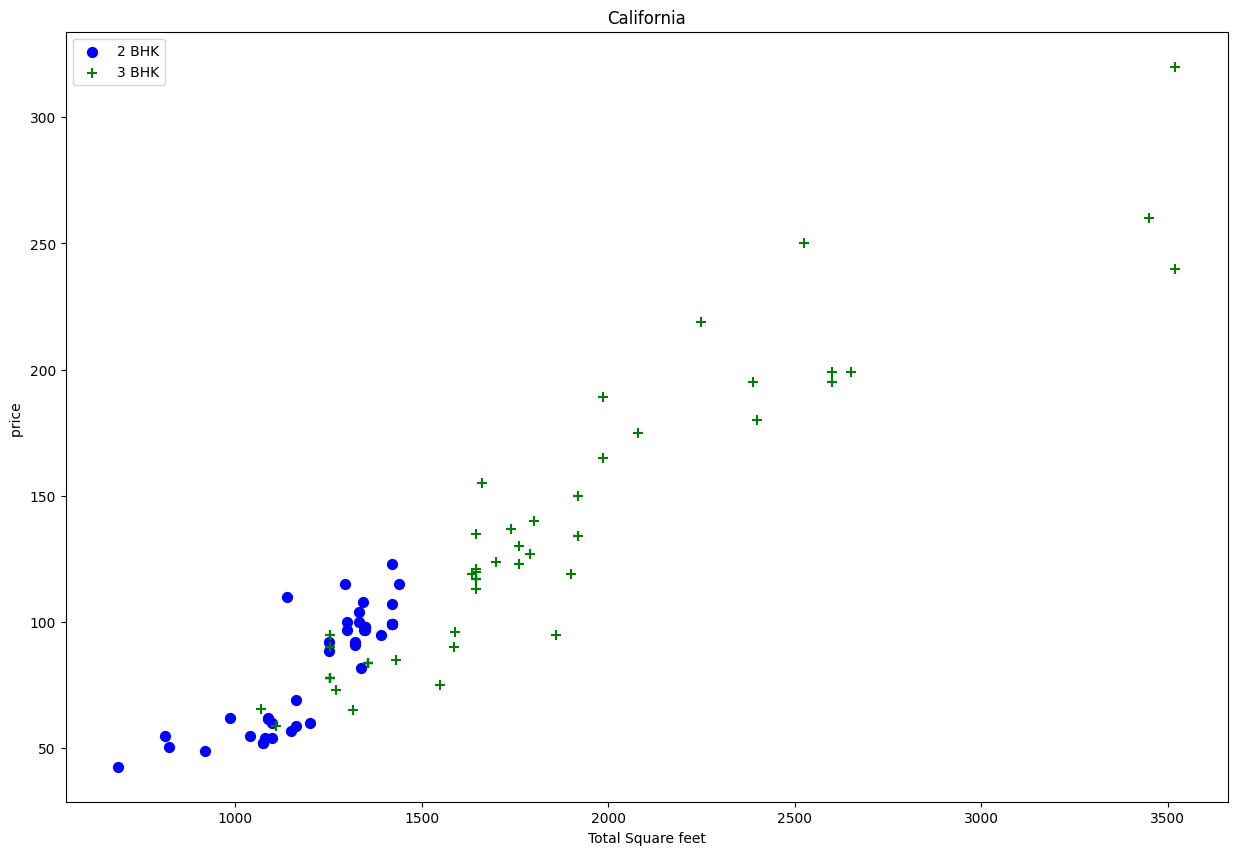

In [46]:
plot_scatter_diagram(data_6,"California")

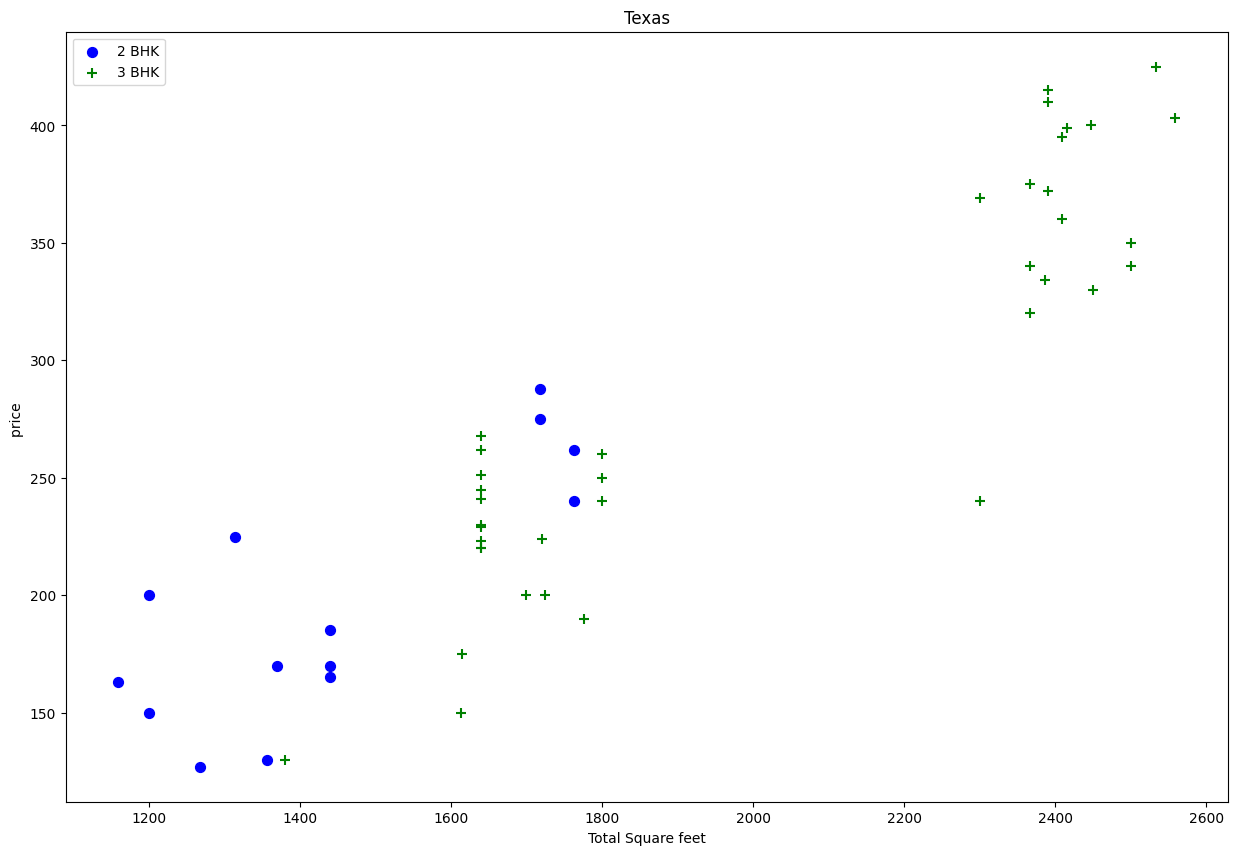

In [47]:
plot_scatter_diagram(data_6,"Texas")

In [48]:
def remove_bhk_outlier(df):
    exclude_indices = np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df.price_per_sqrt),
                'sd' : np.std(bhk_df.price_per_sqrt),
                'count' : bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices,bhk_df[bhk_df.price_per_sqrt < (stats['mean'])].index.values)
    return df.drop(exclude_indices,axis = 'index')

In [49]:
data_7 = remove_bhk_outlier(data_6)
data_7.shape

(7332, 7)

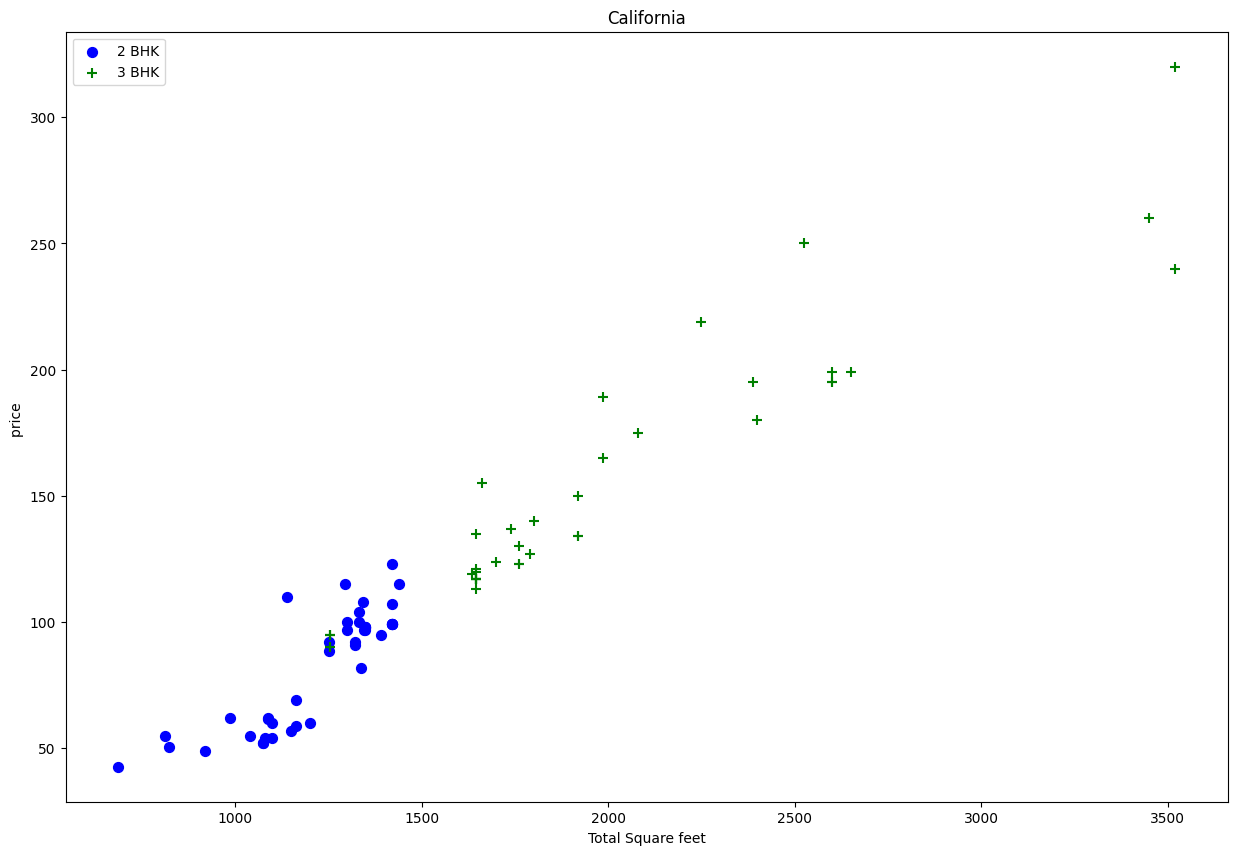

In [50]:
plot_scatter_diagram(data_7,"California")

# Approach 4: Identifying Unusual Bathroom Counts

In [51]:
data_7.bath.unique()

array([ 2.,  4.,  1.,  3.,  5.,  6.,  9.,  7.,  8., 12., 16., 13.])

In [52]:
data_7[data_7.bath>10]

,location,size,total_sqft,bath,price,BHK,price_per_sqrt
5142,McKinney,10 BHK,4000.0,12.0,160.0,10,4000.000000
8479,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8568,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9640,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


In [53]:
data_7[data_7.bath>data_7.BHK+2]

,location,size,total_sqft,bath,price,BHK,price_per_sqrt
1680,Coralville,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
2064,Egton Bridge,3 BHK,1806.0,6.0,116.0,3,6423.034330
3268,Hendersonville,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
8403,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


Text(0, 0.5, 'count')

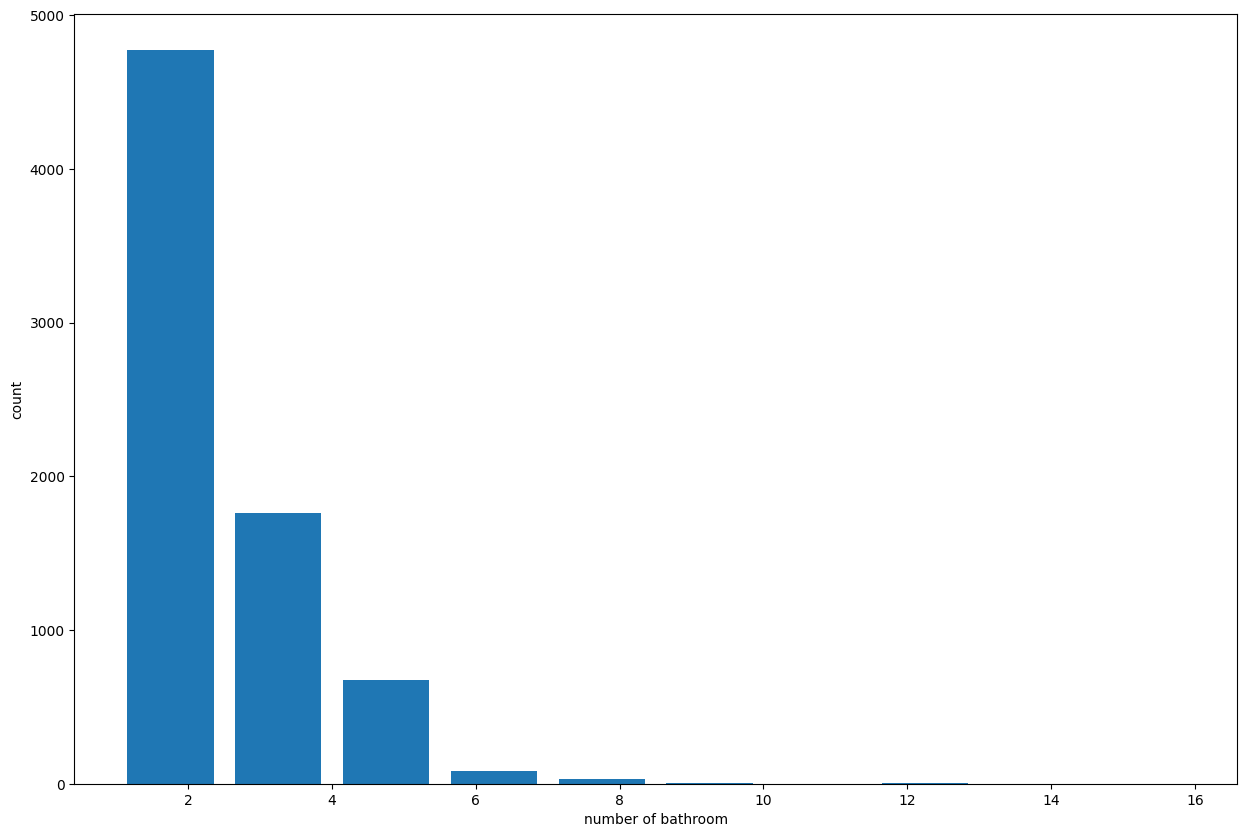

In [54]:
plt.hist(data_7.bath,rwidth = 0.8)
plt.xlabel("number of bathroom")
plt.ylabel("count")

In [55]:
data_8 = data_7[~(((data_7.bath)-(data_7.BHK)) >2)]
data_8.shape

(7328, 7)

# So now we have removed almost ouliers

# Let's start with Model Building

As of now our data set is,

In [56]:
data_8

,location,size,total_sqft,bath,price,BHK,price_per_sqrt
0,Alamogordo,3 BHK,1280.0,2.0,56.0,3,4375.000000
1,Alamogordo,2 BHK,1275.0,2.0,52.0,2,4078.431373
2,Alamogordo,4 BHK,2150.0,4.0,100.0,4,4651.162791
3,Alamogordo,2 BHK,1150.0,2.0,42.0,2,3652.173913
4,Alamogordo,2 BHK,1110.0,2.0,53.0,2,4774.774775
...,...,...,...,...,...,...,...
10237,other,2 BHK,1200.0,2.0,70.0,2,5833.333333
10238,other,1 BHK,1800.0,1.0,200.0,1,11111.111111
10241,other,2 BHK,1353.0,2.0,110.0,2,8130.081301
10242,other,1 Bedroom,812.0,1.0,26.0,1,3201.970443


In [57]:
data_9 = data_8.drop(['size','price_per_sqrt'],axis = 'columns')
data_9

,location,total_sqft,bath,price,BHK
0,Alamogordo,1280.0,2.0,56.0,3
1,Alamogordo,1275.0,2.0,52.0,2
2,Alamogordo,2150.0,4.0,100.0,4
3,Alamogordo,1150.0,2.0,42.0,2
4,Alamogordo,1110.0,2.0,53.0,2
...,...,...,...,...,...
10237,other,1200.0,2.0,70.0,2
10238,other,1800.0,1.0,200.0,1
10241,other,1353.0,2.0,110.0,2
10242,other,812.0,1.0,26.0,1


In [58]:
data_9.head(10)

,location,total_sqft,bath,price,BHK
0,Alamogordo,1280.0,2.0,56.0,3
1,Alamogordo,1275.0,2.0,52.0,2
2,Alamogordo,2150.0,4.0,100.0,4
3,Alamogordo,1150.0,2.0,42.0,2
4,Alamogordo,1110.0,2.0,53.0,2
5,Alamogordo,1060.0,2.0,48.0,2
7,Alamogordo,1063.0,2.0,42.0,2
8,Alamogordo,1470.0,2.0,75.0,3
10,Alamogordo,1050.0,2.0,48.0,2
11,Alamogordo,1132.0,2.0,42.0,2


In [59]:
dummies = pd.get_dummies(data_9["location"]).astype(int)

In [60]:
dummies

,Alamogordo,Alexandria,Alston,Alstonefield,Altus,Anaconda,Apache Junction,Arlington Heights,Aztec,Baltimore,...,Wetton,Wolf Point,Woodburn,Woodstock,Wrangell,Yakima,Yonkers,York,Yukon,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10241,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10242,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [61]:
data_10 = pd.concat([data_9.drop('location',axis = 1),dummies.drop('other',axis = 1)],axis = 1)

In [62]:
data_10

,total_sqft,bath,price,BHK,Alamogordo,Alexandria,Alston,Alstonefield,Altus,Anaconda,...,Waukegan,Wetton,Wolf Point,Woodburn,Woodstock,Wrangell,Yakima,Yonkers,York,Yukon
0,1280.0,2.0,56.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1275.0,2.0,52.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2150.0,4.0,100.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1150.0,2.0,42.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1110.0,2.0,53.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10237,1200.0,2.0,70.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10238,1800.0,1.0,200.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10241,1353.0,2.0,110.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10242,812.0,1.0,26.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
X = data_10.drop('price',axis = 1)
X

,total_sqft,bath,BHK,Alamogordo,Alexandria,Alston,Alstonefield,Altus,Anaconda,Apache Junction,...,Waukegan,Wetton,Wolf Point,Woodburn,Woodstock,Wrangell,Yakima,Yonkers,York,Yukon
0,1280.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1275.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2150.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1150.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1110.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10237,1200.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10238,1800.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10241,1353.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10242,812.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
Y = data_10.price
Y

0         56.0
1         52.0
2        100.0
3         42.0
4         53.0
         ...  
10237     70.0
10238    200.0
10241    110.0
10242     26.0
10245    400.0
Name: price, Length: 7328, dtype: float64

In [65]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

# Grid search CV for finding best model

In [66]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def find_best_model_using_gridsearchcv(X, Y):
    # Define algorithms and their parameters
    algos = {
        'linear_regression': {
            'model': Pipeline([
                ('scaler', StandardScaler()),  # Optional normalization step
                ('regressor', LinearRegression())
            ]),
            'params': {
                'scaler': [None, StandardScaler()],  # Simulates 'normalize': False/True
                'regressor__fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }

    # Initialize ShuffleSplit cross-validation
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    # Perform GridSearch for each algorithm
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, Y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

# Example usage
# Assuming X and Y are your feature matrix and target variable
# Replace X and Y with your dataset
find_best_model_using_gridsearchcv(X, Y)

C:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py

,model,best_score,best_params
0,linear_regression,0.840118,"{'regressor__fit_intercept': False, 'scaler': ..."
1,lasso,0.692238,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.681535,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


# So here we are using Linear Regression for model building

In [67]:
lr = LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.8670688182257016

In [68]:
y_pred = lr.predict(x_test)

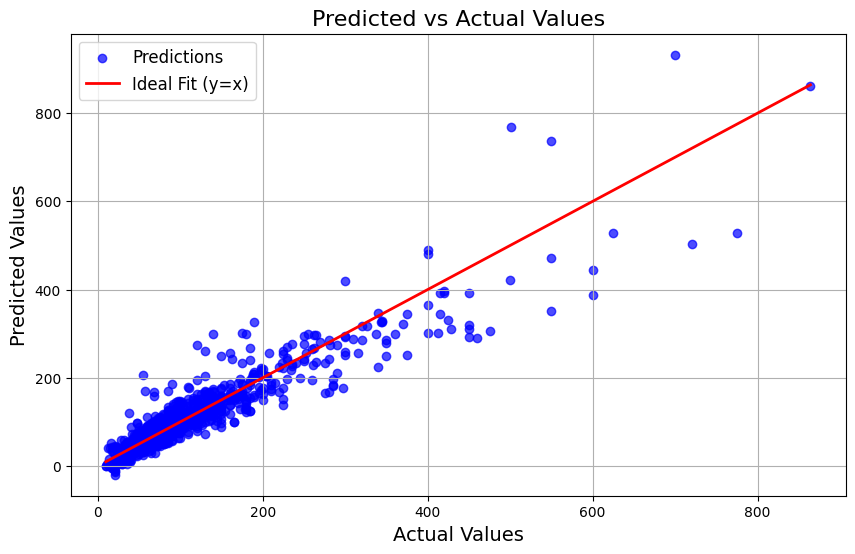

In [69]:
# Plot Predicted vs. Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predictions', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Ideal Fit (y=x)')

# Add Plot Labels and Legend
plt.title("Predicted vs Actual Values", fontsize=16)
plt.xlabel("Actual Values", fontsize=14)
plt.ylabel("Predicted Values", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

# Display Plot
plt.show()

In [70]:
def location_converter(x):
    if x in data_1.location.values:
        unique_locations_data_1 = set(data_1['location'])
        unique_locations_data_9 = set(data_9['location'])
        locations_not_in_data_9 = unique_locations_data_1 - unique_locations_data_9
        filtered_data_1 = data_1[data_1['location'].isin(locations_not_in_data_9)]
        if x in filtered_data_1.location.values:
            x = "other"
        else:
            x = x
        
    else:
        x = 'Re-enter'
    return x



In [71]:
def price_prediction(location,sqrft,bath,bhk):
    if location_converter(location) == 'Re-enter':
        print('I think you entered a wrong location')
    elif location_converter(location) == 'other':
        x = np.zeros(len(X.columns))
        x[0] = sqrft 
        x[1] = bath
        x[2] = bhk
        return lr.predict([x])[0]
    else:
        location_index = np.where(X.columns == location)[0][0]
        x = np.zeros(len(X.columns))
        x[0] = sqrft 
        x[1] = bath
        x[2] = bhk
        if location_index > 0:
            x[location_index] = 1
        return lr.predict([x])[0]
    


In [72]:
X.columns

Index(['total_sqft', 'bath', 'BHK', 'Alamogordo', 'Alexandria', 'Alston',
       'Alstonefield', 'Altus', 'Anaconda', 'Apache Junction',
       ...
       'Waukegan', 'Wetton', 'Wolf Point', 'Woodburn', 'Woodstock', 'Wrangell',
       'Yakima', 'Yonkers', 'York', 'Yukon'],
      dtype='object', length=243)

In [73]:
price_prediction('Pennsylvania',1500,3,3)

C:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


123.1164888721375

In [74]:
price_prediction('Pennsylvania',1500,2,2)

C:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


122.07091975584791

In [75]:
price_prediction('Woodburn',1800,2,2)

C:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


118.50220068247705

In [76]:
price_prediction('Woodburn',1800,3,2)

C:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


121.87493102506419

In [77]:
import pickle
with open('USA_property_price_prediction_model.pickle','wb') as f:
    pickle.dump(lr,f)


In [78]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))